In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

df = pd.read_csv('Mall_Customers.csv')
df = df.drop('CustomerID', axis = 1)
df = df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Score"})
df.head()

,Genre,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [2]:
print('Добавление нового столбца (частота посещений магазина)')
df['Frequency'] = df['Score'] / df['Income']
df.head()

Добавление нового столбца (частота посещений магазина)


,Genre,Age,Income,Score,Frequency
0,Male,19,15,39,2.600000
1,Male,21,15,81,5.400000
2,Female,20,16,6,0.375000
3,Female,23,16,77,4.812500
4,Female,31,17,40,2.352941


In [3]:
print('Проверка на наличие пустых значений в столбцах')
pd.isnull(df).sum()

Проверка на наличие пустых значений в столбцах


Genre        0
Age          0
Income       0
Score        0
Frequency    0
dtype: int64

Пропусков нет

array([<Axes: title={'center': 'Age'}>,
       <Axes: title={'center': 'Income'}>,
       <Axes: title={'center': 'Score'}>,
       <Axes: title={'center': 'Frequency'}>], dtype=object)

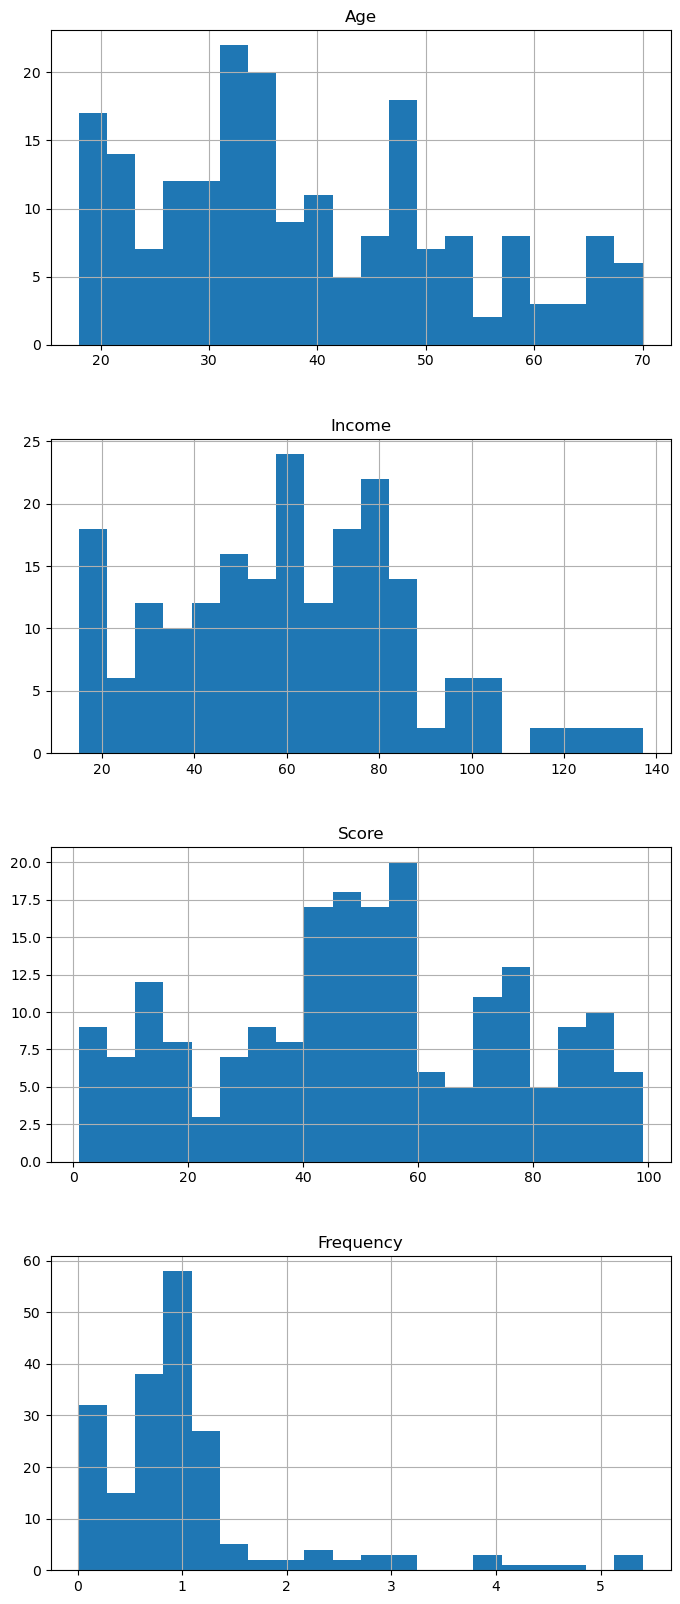

In [4]:
fig, axis = plt.subplots(4, 1, figsize = (8, 20))
df.hist(ax=axis, bins = 20)

В целом, выбросы не обнаружены;
По какой-то причине в данных остутствуют некоторые возраста

In [5]:
df.duplicated().sum()

0

Дубликатов нет

In [6]:
nums = ['Age', 'Income', 'Score', 'Frequency']
cats = ['Genre']
df[nums].corr()

,Age,Income,Score,Frequency
Age,1.000000,-0.012398,-0.327227,-0.319667
Income,-0.012398,1.000000,0.009903,-0.570437
Score,-0.327227,0.009903,1.000000,0.593228
Frequency,-0.319667,-0.570437,0.593228,1.000000


Видна слабая корреляция Age к Score 

d:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Матрица графиков рассеивания')

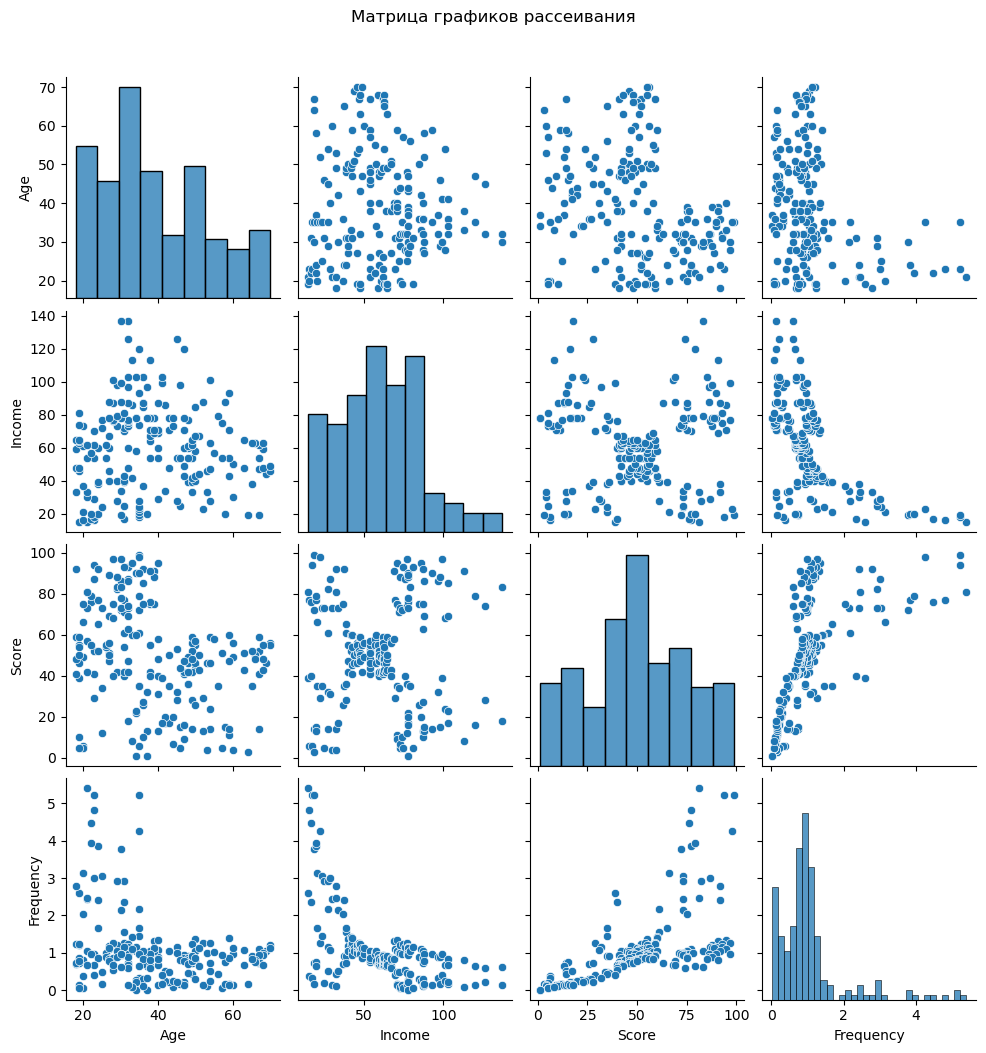

In [7]:
g = sns.pairplot(df[nums])
g.fig.suptitle('Матрица графиков рассеивания', y = 1.05)

In [8]:
'''Age and spending Score'''
X1 = df[['Age' , 'Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [10]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

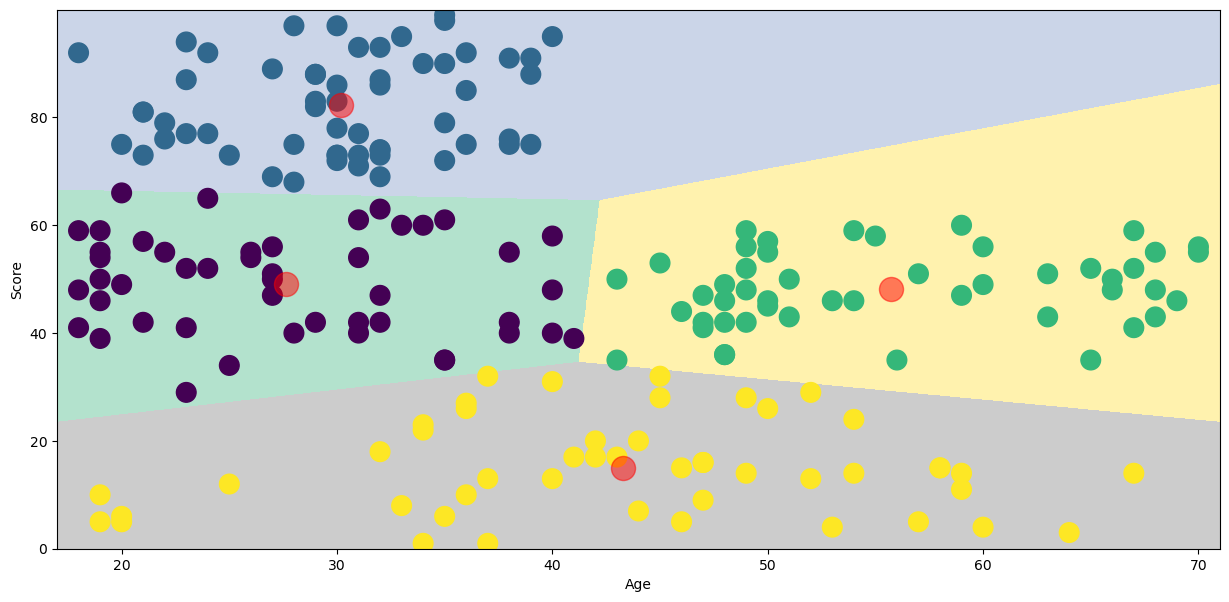

In [11]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Score' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Score') , plt.xlabel('Age')
plt.show()

In [12]:
'''Annual Income and spending Score'''
X2 = df[['Income' , 'Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [14]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

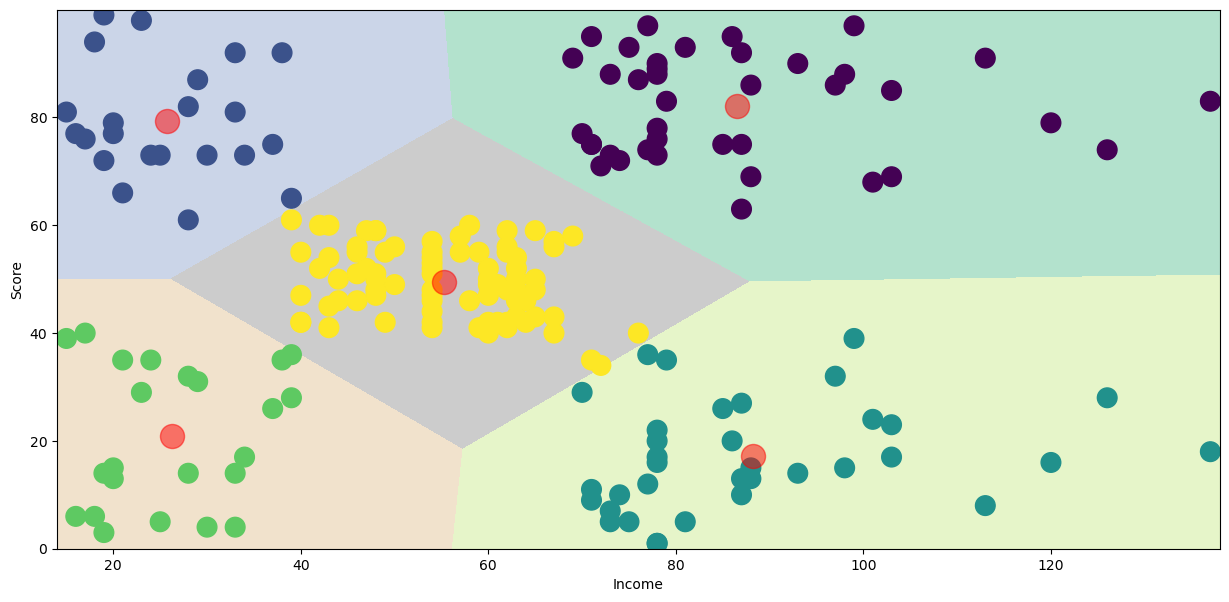

In [15]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Income' ,y = 'Score' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Score') , plt.xlabel('Income')
plt.show()

### Итог:
Методом KMeans удалось выявить 4 группы в связке Score-Age и 5 групп в связке Score-Income
